# **Breast Cancer Data Exploration**

-----------------------------
## **Context**
-----------------------------

Breast cancer is a common and potentially deadly disease that affects a significant number of people, predominantly women. Analyzing breast cancer data is essential for several reasons:

   - Early detection: Analyzing breast cancer data can help healthcare professionals identify patterns and risk factors associated with the disease. This can help with early detection, which is critical to improving patient outcomes and survival rates.

   - Treatment decisions: Analyzing breast cancer data can also provide insights into how different types of breast cancer respond to different treatments. This information can help doctors make more informed decisions about which treatments to use for individual patients.

   - Research: Analyzing breast cancer data can help researchers identify new potential treatments, risk factors, and preventative measures for the disease. This information can lead to improved outcomes and a better understanding of the disease.


Overall, analyzing breast cancer data is essential for improving patient outcomes, advancing our understanding of the disease, and making more informed decisions about prevention, diagnosis, and treatment.


In this case study, we will explore and visualize the Breast Cancer dataset, which contains information about features  computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 

-----------------------------
## **Objective** 
-----------------------------

The objective of this problem is to reduce the number of features by using dimensionality reduction techniques such as PCA and t-SNE, and extract insights about the data. 

-----------------------------
## **Dataset** 
-----------------------------
- This dataset describes characteristics of the cell nuclei present in the images of each breast meass. Obtained from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29



## **Importing libraries and overview of the dataset**


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

**Let's get an overview of the data and prepare it for visualization**

In [2]:
# Loading the data
data_breast_cancer = pd.read_csv("data.csv")

In [3]:
data_breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Checking the info of the data**

In [4]:
data_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Observations:**

- There are **569 observations and 23 columns** in the data.
- **All the columns except diagnosis are numeric data type**.
- There are not **missing values**.


## **Data Preprocessing and Exploratory Data Analysis**

In [5]:
# Dropping the columns - ID and diagnosis and Unnamed 32
#data_breast_cancer=data_breast_cancer[data_breast_cancer['diagnosis']=='M']
data_breast_cancer.drop(columns = ["id", "diagnosis",'Unnamed: 32'], inplace = True)

### **Summary Statistics**

In [6]:
data_breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


**Let's check the distribution and outliers for numerical columns in the data**

radius_mean
Skew : 0.94


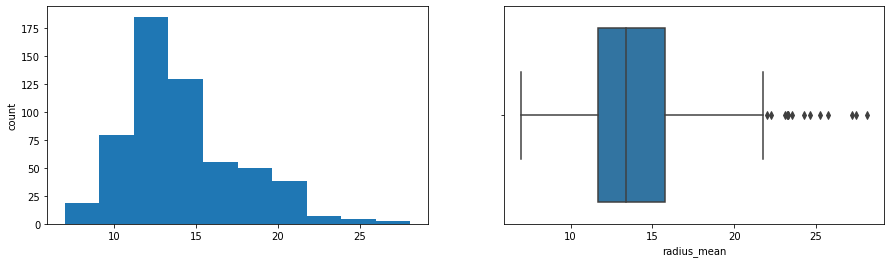

texture_mean
Skew : 0.65


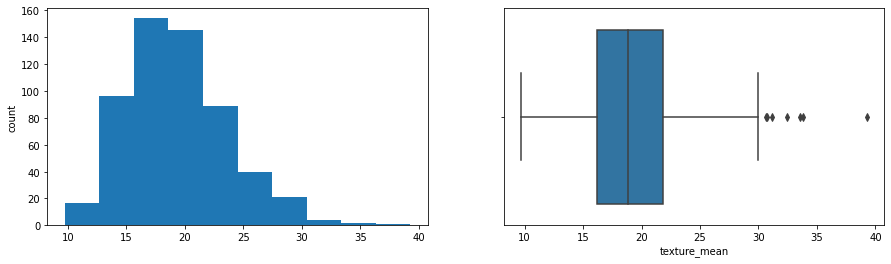

perimeter_mean
Skew : 0.99


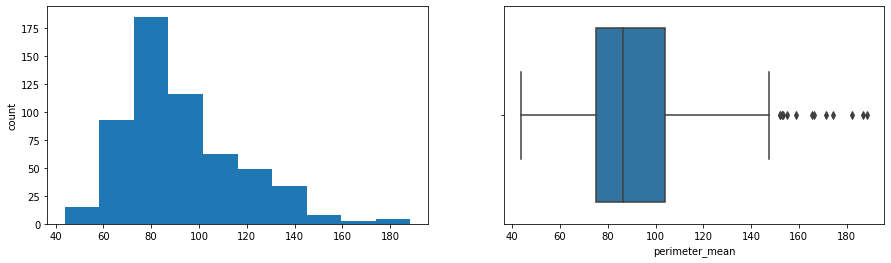

area_mean
Skew : 1.65


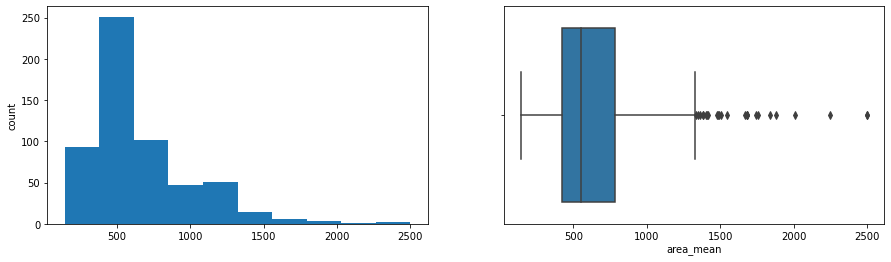

smoothness_mean
Skew : 0.46


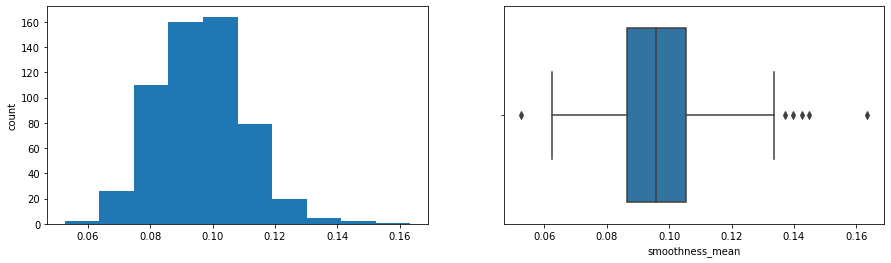

compactness_mean
Skew : 1.19


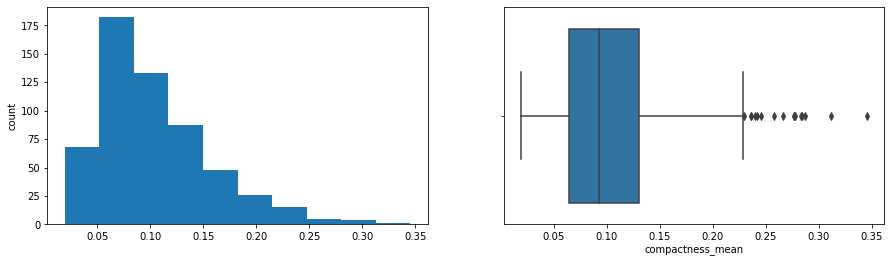

concavity_mean
Skew : 1.4


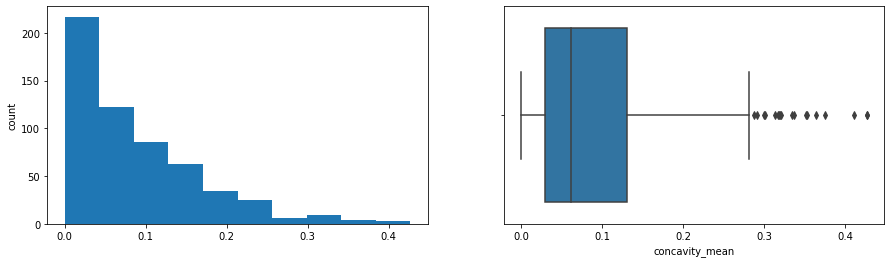

concave points_mean
Skew : 1.17


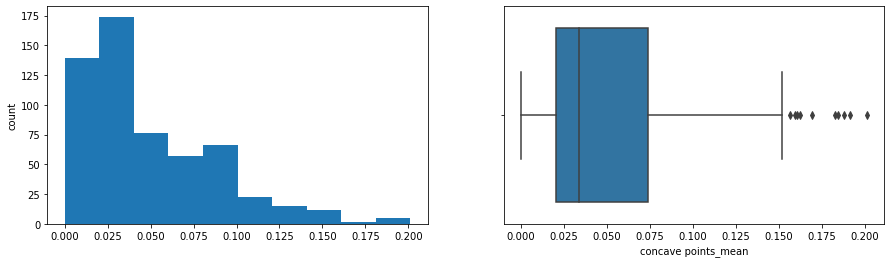

symmetry_mean
Skew : 0.73


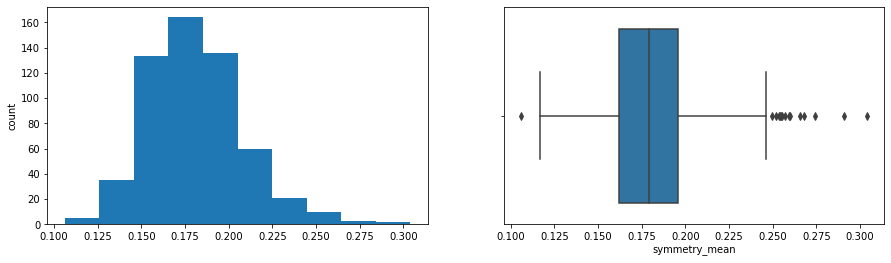

fractal_dimension_mean
Skew : 1.3


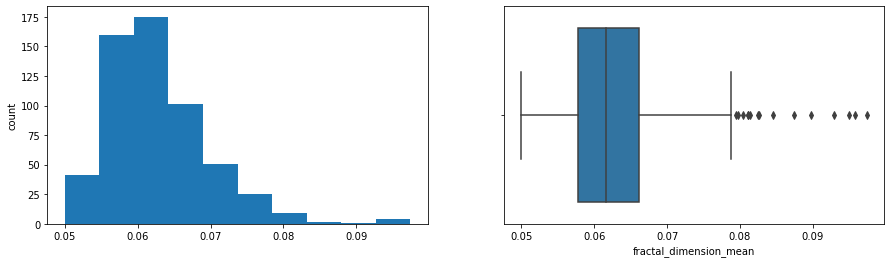

radius_se
Skew : 3.09


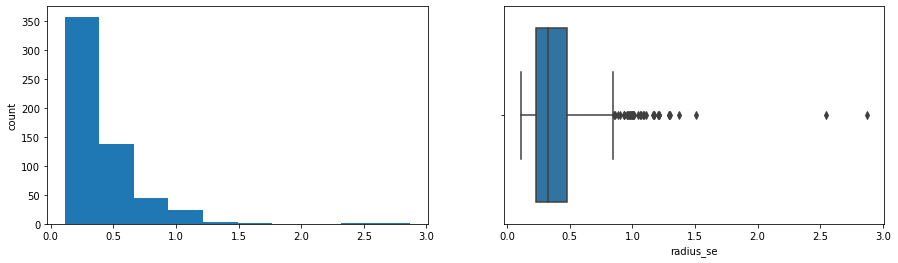

texture_se
Skew : 1.65


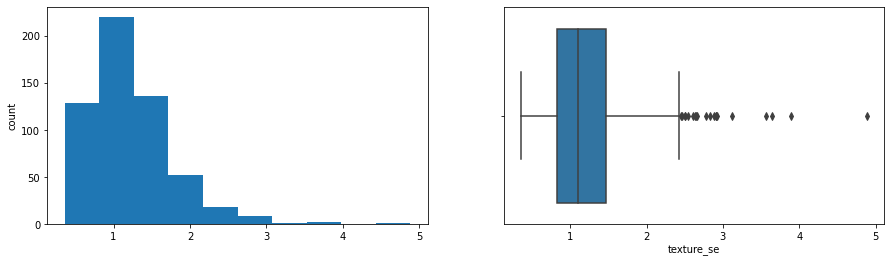

perimeter_se
Skew : 3.44


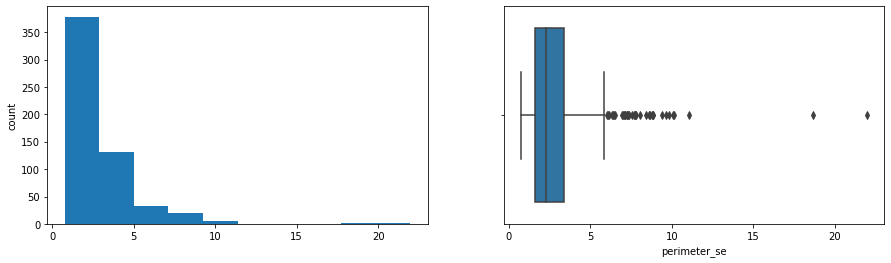

area_se
Skew : 5.45


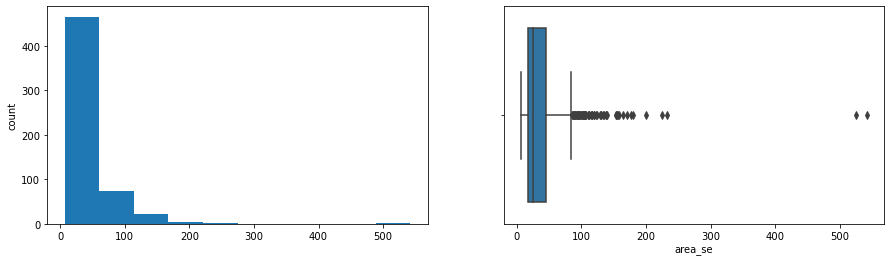

smoothness_se
Skew : 2.31


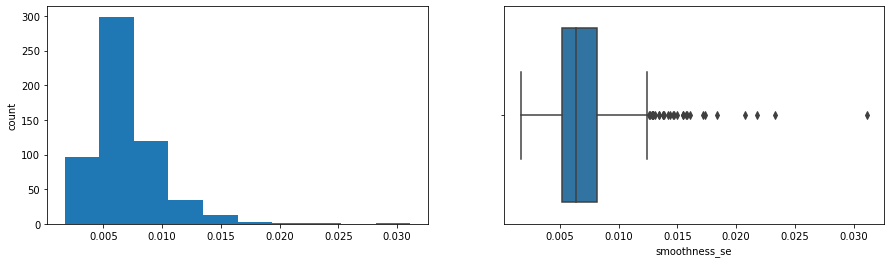

compactness_se
Skew : 1.9


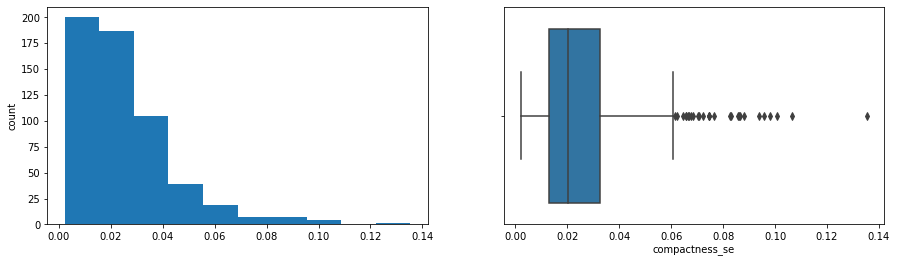

concavity_se
Skew : 5.11


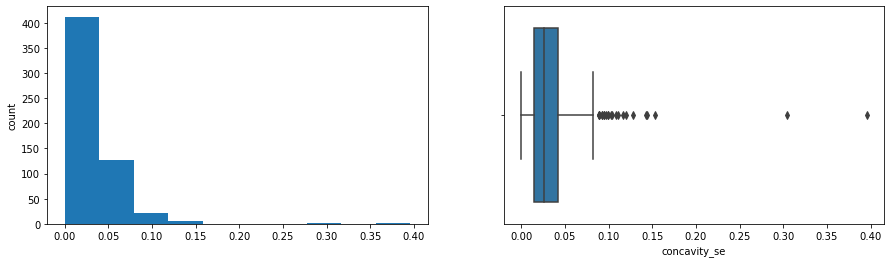

concave points_se
Skew : 1.44


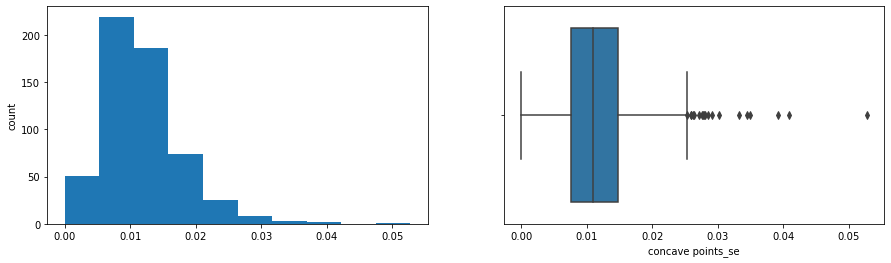

symmetry_se
Skew : 2.2


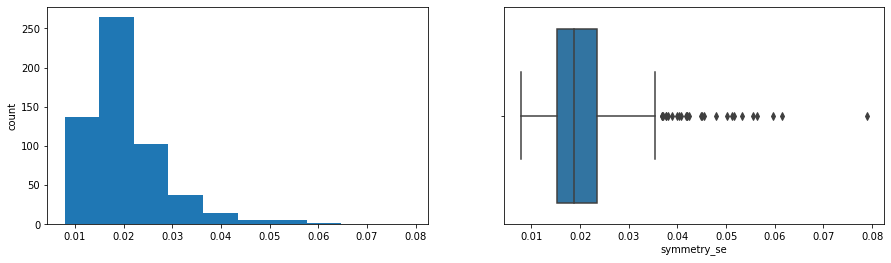

fractal_dimension_se
Skew : 3.92


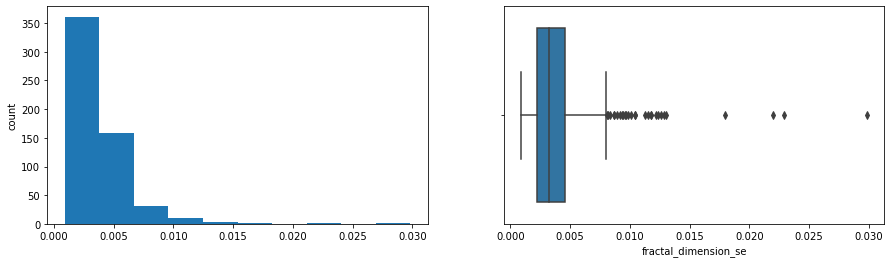

radius_worst
Skew : 1.1


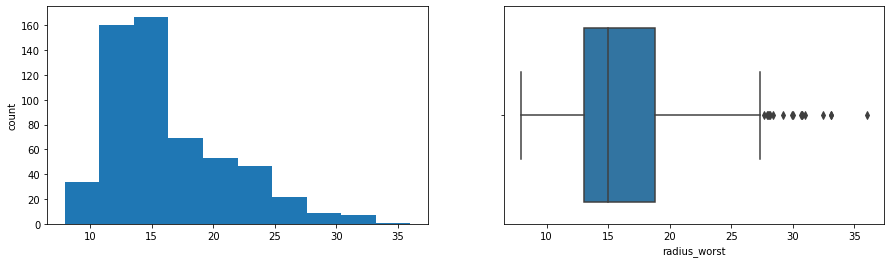

texture_worst
Skew : 0.5


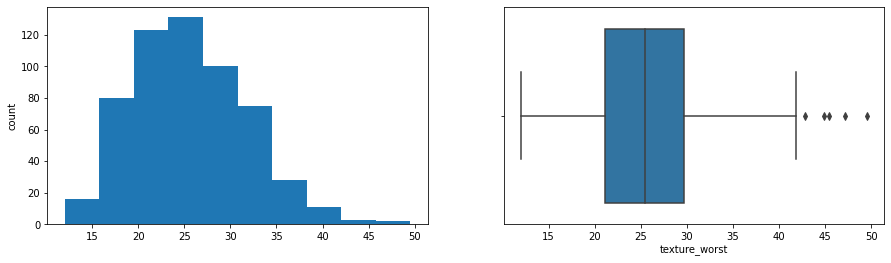

perimeter_worst
Skew : 1.13


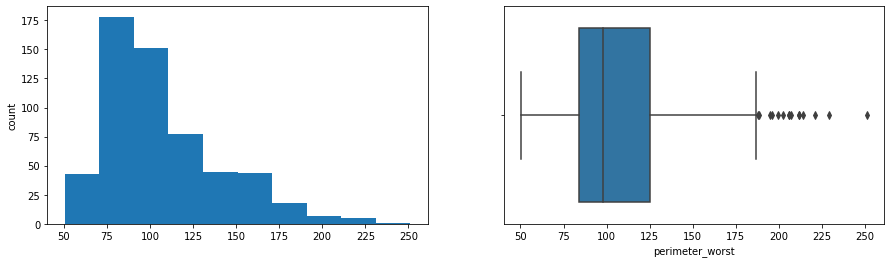

area_worst
Skew : 1.86


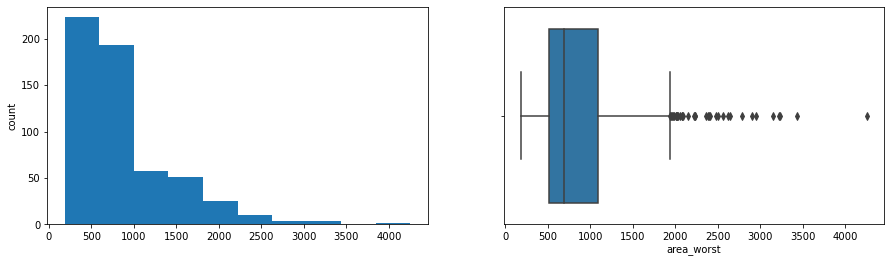

smoothness_worst
Skew : 0.42


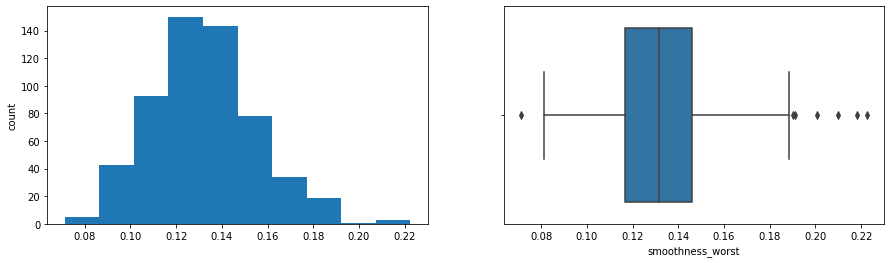

compactness_worst
Skew : 1.47


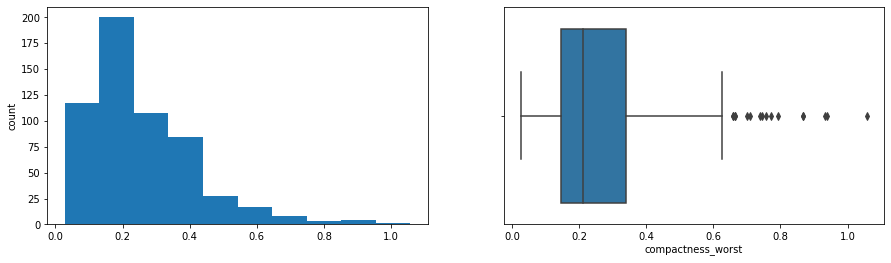

concavity_worst
Skew : 1.15


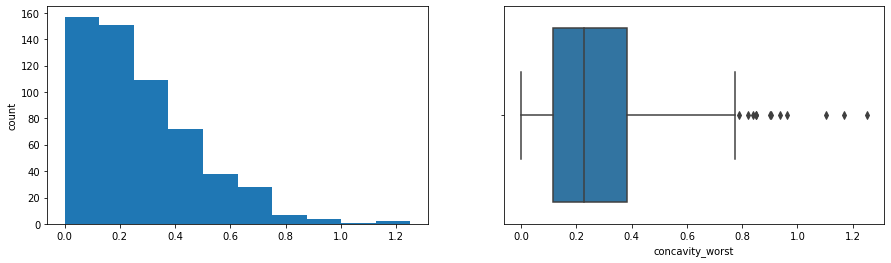

concave points_worst
Skew : 0.49


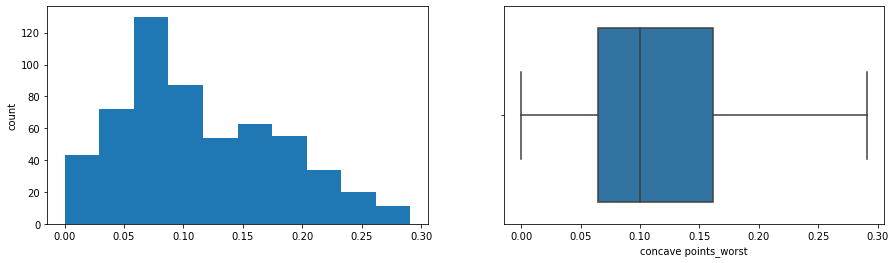

symmetry_worst
Skew : 1.43


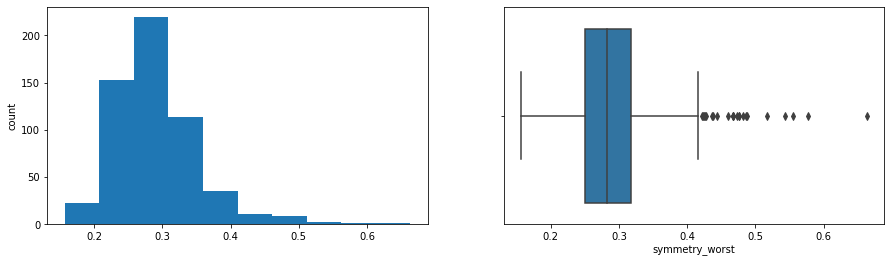

fractal_dimension_worst
Skew : 1.66


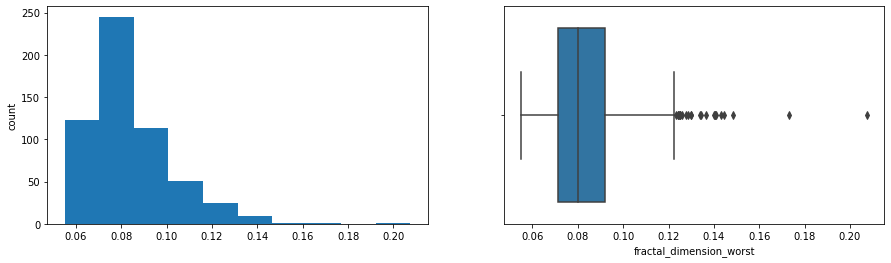

In [7]:
result = data_breast_cancer.select_dtypes(include = 'number')

cont_cols = list(result)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(data_breast_cancer[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data_breast_cancer[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data_breast_cancer[col])
    
    plt.show()

**Observations:**
- In general, the distribution plots have a normal behavior with a moderate right skew. It is evident from the boxplots that all these variables have outliers towards the right.


**Now, let's check the correlation among different variables**

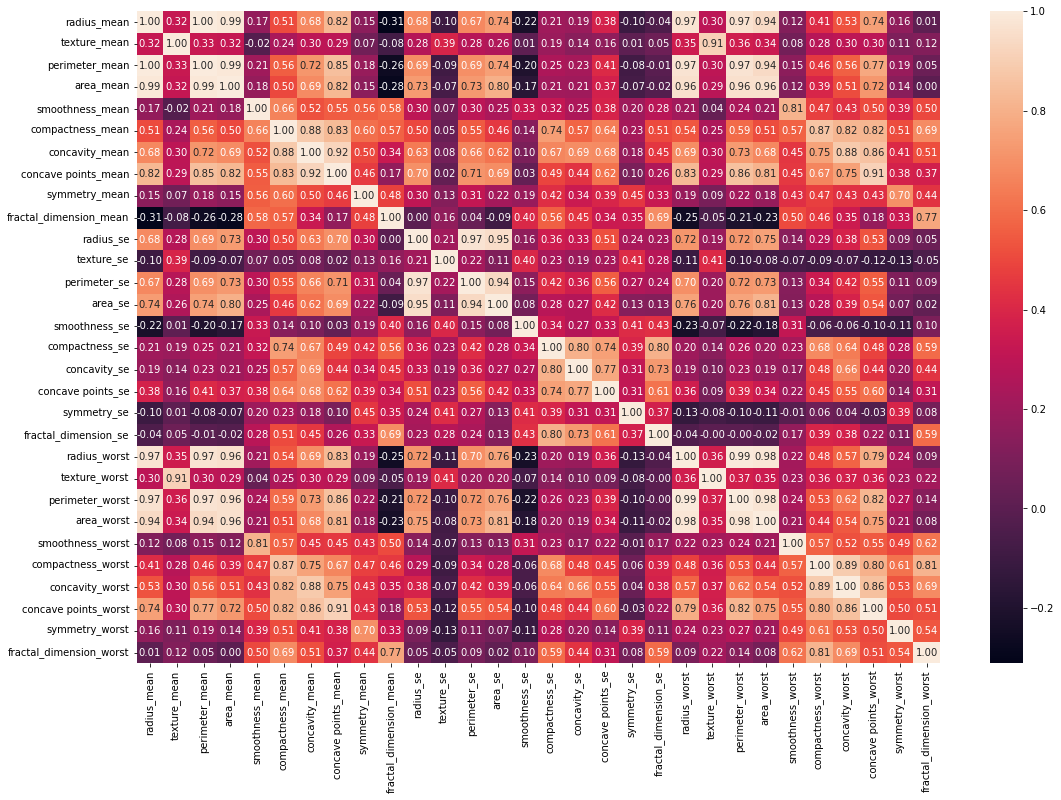

In [8]:
plt.figure(figsize = (18, 12))

sns.heatmap(data_breast_cancer.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- We can see a **very high positive correlation** among the following variables: 
    1. radius_mean and perimeter_mean
    2. radius_mean and area_mean
    3. radius_mean and radius_worst
    4. radius_mean and perimeter_worst
    5. radius_mean and area_worst  
    6. texture_mean and texture_worst
    7. perimeter_mean and area_mean
    8. perimeter_mean and radius_worsr
    9. perimeter_mean and perimeter_worsr
    10. perimeter_mean and area_worsr
    
<br/>   

- Geometrical features seems to be highly correlated.
- There are a lot of varibles with a high correlation among them.


### **Data Preprocessing**

#### **Scaling the data**

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_breast_cancer)

In [10]:
data_scaled = pd.DataFrame(data_scaled, columns = data_breast_cancer.columns)

## **Principal Component Analysis**

In [11]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

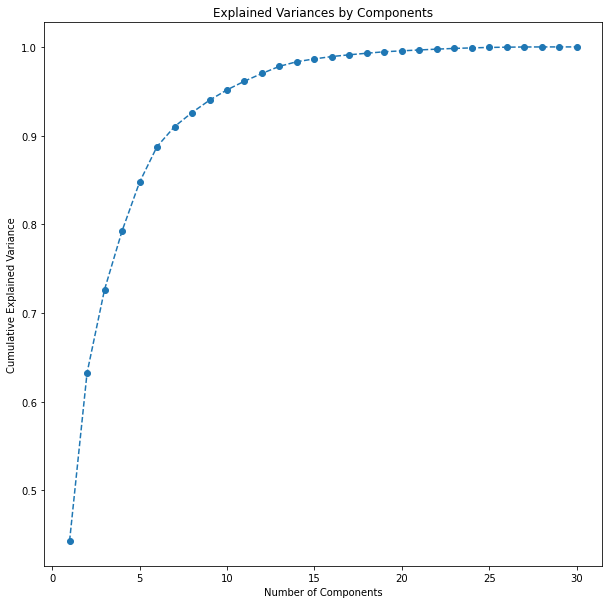

In [12]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 31), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [13]:
# Find the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var1):
    
    sum = sum + i
    
    if(sum>0.70):
        print("Number of PCs that explain at least 70% variance: ", ix + 1)
        break

Number of PCs that explain at least 70% variance:  3


In [15]:
# Making a new dataframe with first 5 principal components as columns and original features as indices
cols = ['PC1', 'PC2', 'PC3']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:3], 2), index = data_scaled.columns, columns = cols)
pc1

,PC1,PC2,PC3
radius_mean,0.22,-0.23,-0.01
texture_mean,0.10,-0.06,0.06
perimeter_mean,0.23,-0.22,-0.01
area_mean,0.22,-0.23,0.03
smoothness_mean,0.14,0.19,-0.10
compactness_mean,0.24,0.15,-0.07
concavity_mean,0.26,0.06,0.00
concave points_mean,0.26,-0.03,-0.03
symmetry_mean,0.14,0.19,-0.04
fractal_dimension_mean,0.06,0.37,-0.02


**Observations:**

- The first principal component, PC1, seems to be related to features like concavity_mean, concave points_mean.  
- The second principal component, PC2, seems to be related to features like fractal_dimension_se, and fractal_dimension_worst.  
- The third principal component, PC3, seems to be related to features like texture_se, and smoothness_se.  





## **t-SNE**

Let's try to **visualize the data for different perplexity values** 

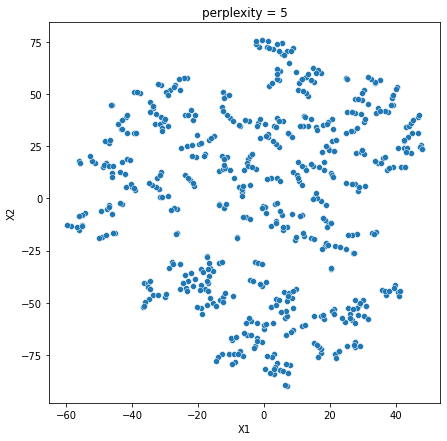

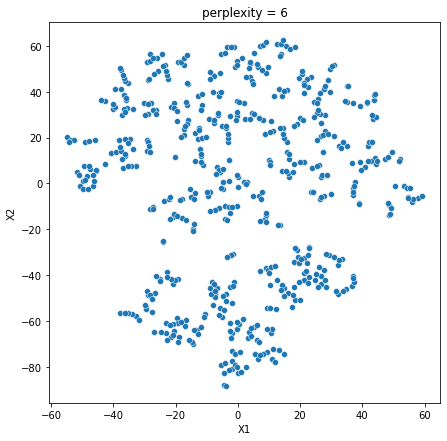

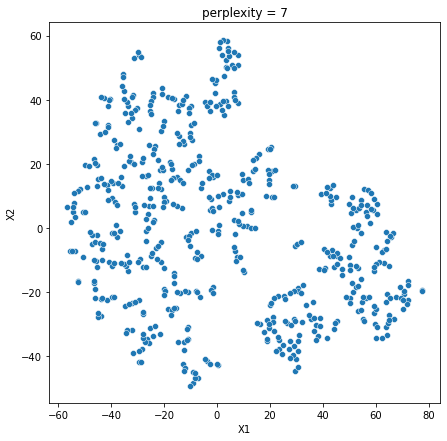

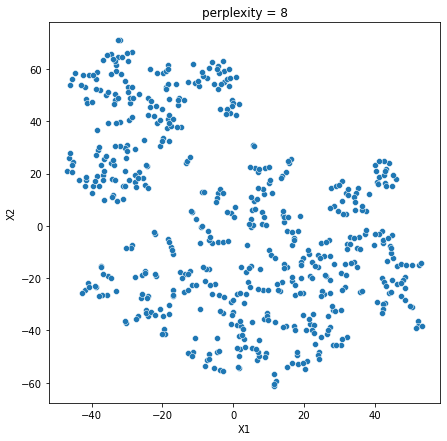

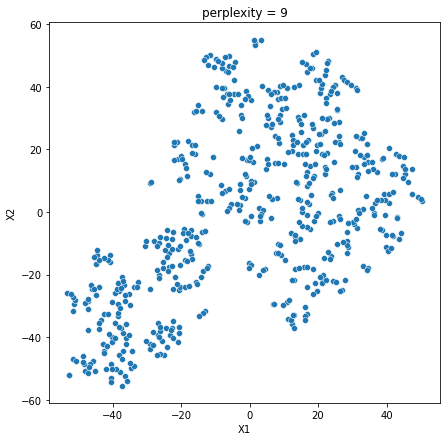

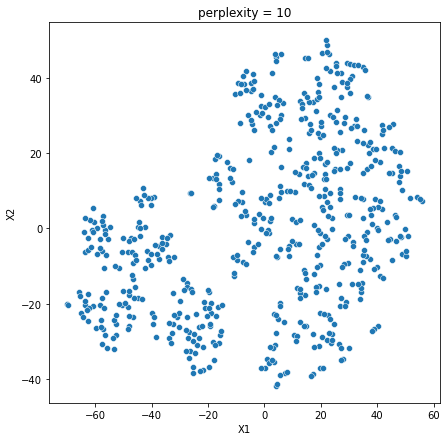

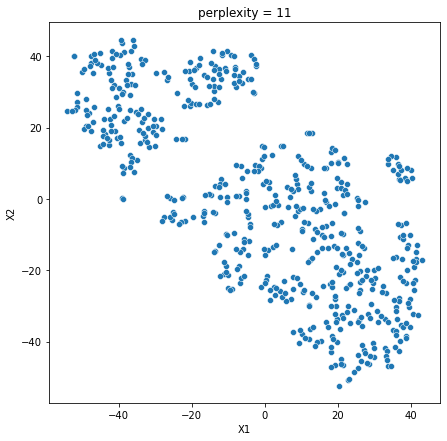

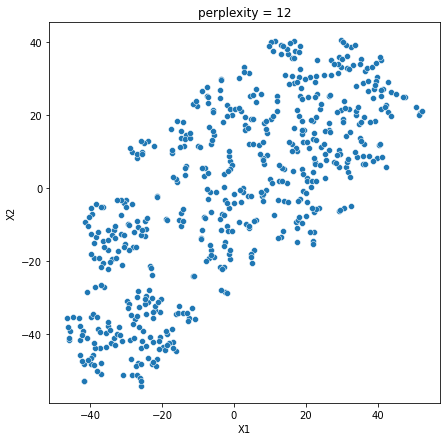

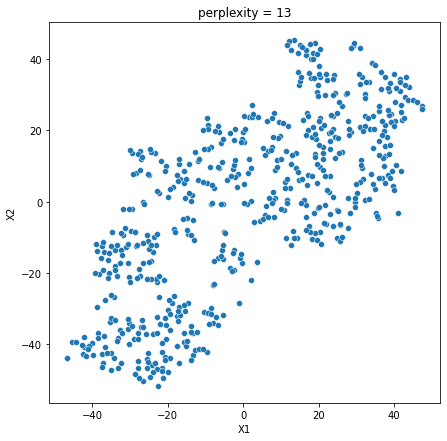

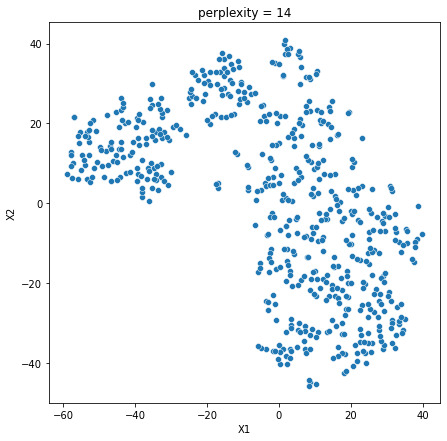

In [16]:
for i in range(5, 15, 1):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(data_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)
    
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7,7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))

**Observations:**

- We observe that some perplexity values like 11 can capture the  patterns in the data better than other values.
- This shows that perplexity plays an important role in t-SNE implementation.
- Let's visualize again with **perplexity equal to 11 as  2  clear groups distant from each other, i.e., well separated.**

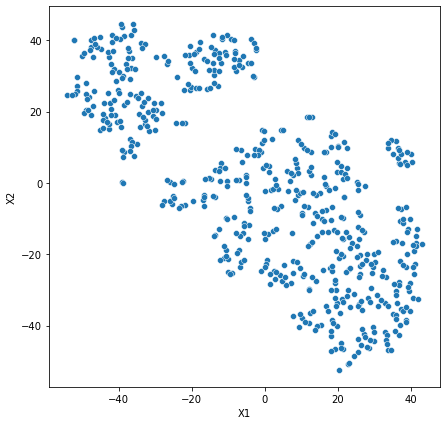

In [17]:
# Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 11)

data_tsne = tsne.fit_transform(data_scaled)

# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns = ["X1", "X2"])

# Scatter plot for two components
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

In [18]:
# Let's assign points to 4 different groups
def grouping(x):
    first_component = x['X1']
    
    second_component = x['X2']
    
    if second_component > 30+ first_component:
        return 'group_1'
    
    else: 
        return 'group_2'

In [19]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

<AxesSubplot:xlabel='X1', ylabel='X2'>

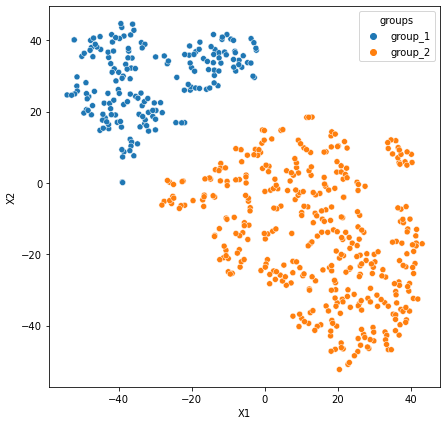

In [20]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = 'groups')

**Now, let's try to visualize the properties of these four groups with respect to all the numeric variables in the data.** 

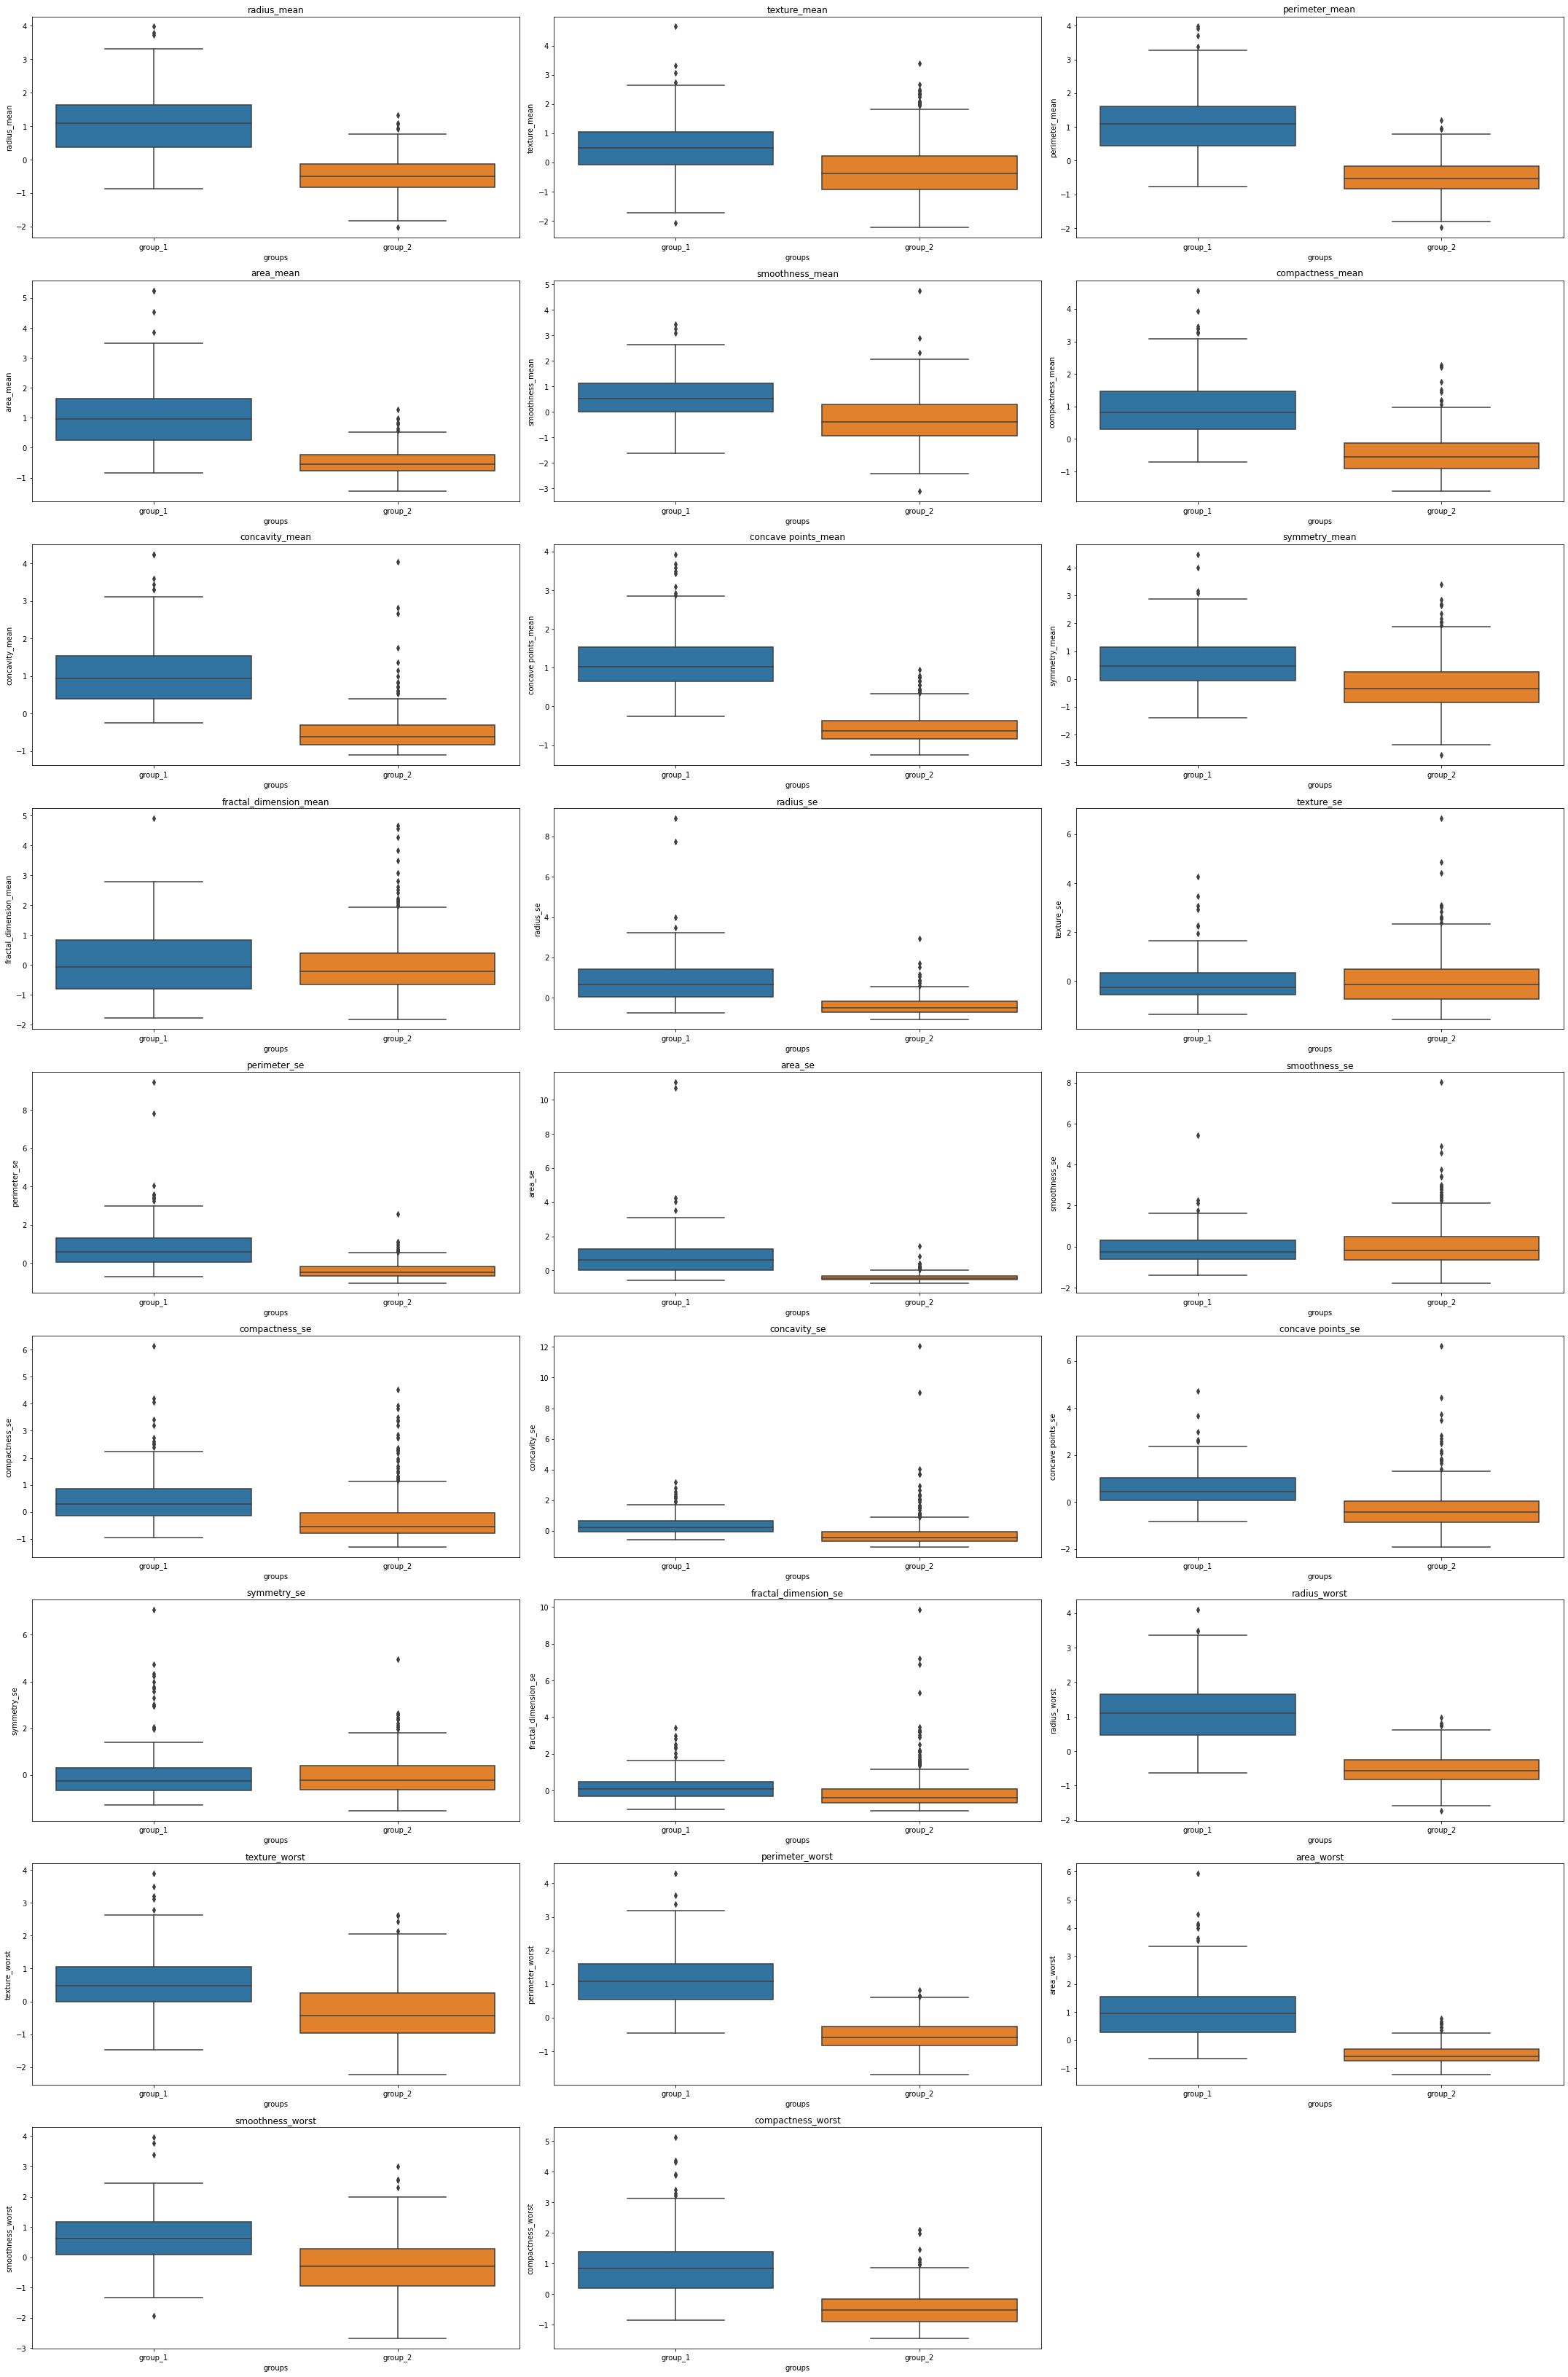

In [21]:
all_col = data_scaled.columns[:-4].tolist()

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(10, 3, i + 1)
    
    sns.boxplot(y=data_scaled[variable], x=data_tsne['groups'])
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:**
- There are two groups in the data. Each group has a different set of characteristics.

- **Group 1 represents larger, asymmetric masses with more irregularities.** In this group, it represents larger, asymmetric masses with more irregularities, so it probably corresponds to the case of people with cancer. 

